In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from utils.paths import DATA_RAW_DIR

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor

import ipywidgets as widgets
from IPython.display import display

In [ ]:
path_partidos = str(DATA_RAW_DIR / 'partidos_cebollitas.csv')

print('Path:', path_partidos)
print('Does path exist?', Path(path_partidos).exists())

df_partidos = pd.read_csv(path_partidos, sep=',', encoding='utf-8')

Path: /Users/jssdev/Dev/Learning/Platzi/platzi-machine-learning/data/raw/partidos_cebollitas.csv
Does path exist? True


In [3]:
# Crear nuevas variables que ayudarán al modelo
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']
df_partidos['diferencia_posesion'] = df_partidos['posesion_local (%)'] - df_partidos['posesion_visitante (%)']
df_partidos['eficiencia_tiros_local'] = df_partidos['goles_local'] / (df_partidos['tiros_arco_local'] + 1e-5)
df_partidos['eficiencia_tiros_visitante'] = df_partidos['goles_visitante'] / (df_partidos['tiros_arco_visitante'] + 1e-5)
df_partidos['local_es_cebollitas'] = (df_partidos['equipo_local'] == 'Cebollitas FC').astype(int)


In [4]:
df_partidos = pd.get_dummies(df_partidos, columns=['estadio'], drop_first=True)

In [5]:
# Elegimos las variables más informativas
features = [
    'posesion_local (%)', 'tiros_arco_local', 'diferencia_posesion',
    'eficiencia_tiros_local', 'eficiencia_tiros_visitante',
    'local_es_cebollitas'
] + [col for col in df_partidos.columns if col.startswith("estadio_")]

X = df_partidos[features]
y = df_partidos['diferencia_goles']

In [6]:
# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Entrenamos el modelo Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = modelo_rf.predict(X_test)

In [9]:
# Métricas de evaluación
from sklearn.metrics import mean_absolute_error


rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"📊 RMSE: {rmse_rf:.2f}")
print(f"📉 MAE: {mae_rf:.2f}")
print(f"📈 R²: {r2_rf:.2f}")


📊 RMSE: 0.93
📉 MAE: 0.70
📈 R²: 0.82


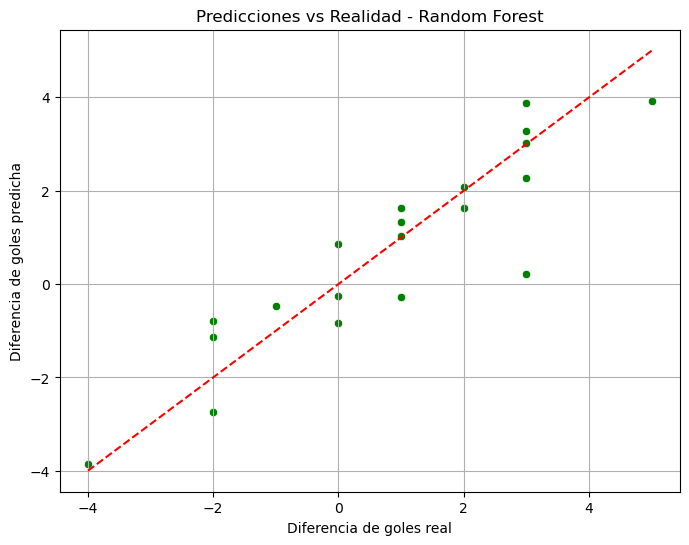

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Diferencia de goles real")
plt.ylabel("Diferencia de goles predicha")
plt.title("Predicciones vs Realidad - Random Forest")
plt.grid(True)
plt.show()

In [11]:
# Métricas obtenidas del modelo de regresión lineal
metricas_rl = {
    'Modelo': 'Regresión Lineal',
    'RMSE': 2.23,
    'MAE': 1.89,
    'R²': -0.03
}

# Métricas del Árbol de Decisión (bonus)
metricas_arbol = {
    'Modelo': 'Árbol de Decisión',
    'RMSE': 0.93,
    'MAE': 0.70,
    'R²': 0.82
}

# Comparación
df_comparacion = pd.DataFrame([metricas_rl, metricas_arbol])
display(df_comparacion)

,Modelo,RMSE,MAE,R²
0,Regresión Lineal,2.23,1.89,-0.03
1,Árbol de Decisión,0.93,0.70,0.82


### 🤔 ¿Qué observamos?

- El modelo de Regresión Lineal tiene un **R² negativo**, lo que indica que es peor que simplemente predecir el promedio.
- El Árbol de Decisión mejora todas las métricas:
  - Menor error (RMSE y MAE)
  - Mayor capacidad de explicar la variabilidad (R² positivo)

Esto sugiere que la relación entre variables no es lineal, y por eso el modelo lineal no capta bien el patrón.

---

## 🛠️ ¿Qué aprendimos hasta ahora?

1. Cómo preparar datos y construir modelos básicos.
2. Qué métricas evaluar.
3. Que no todos los algoritmos sirven para todos los problemas.

---

## 🧭 ¿Y ahora qué?

Podemos rediseñar nuestra estrategia a partir del Árbol de Decisión:

- Redefinir el pipeline
- Mejorar visualizaciones
- Explorar nuevos modelos más robustos

Esto marca un **nuevo comienzo** más realista y alineado con el comportamiento de los datos.

